# Projet 5 - <font color='green'>Notebook 1</font> - Segmentez des clients d'un site e-commerce

L'objectif de ce projet est de réaliser une segmentation de clients à partir des [données du site de commerce électronique Olist](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce).

Les données de base sont constituées de 9 fichiers et concernent les commandes effectuées au cours d'une période de 2 ans. Les fichiers ne fournissent pas d'information sur les clients autres que celles nécessaires aux commandes par e-commerce (localisation, commandes effectuées, dates, articles commandés, prix, paiements et éventuels commentaires clients). Pour cette raison, la segmentation est centrée sur l'approche RFM (Récence, Fréquence et Montant des commandes), enrichie le cas échéant par des caractéristiques complémentaires.

Le projet consiste à :

- (a) constituer un jeu de données clients nettoyé,
- (b) l'analyser pour en acquérir la meilleure compréhension,
- (c) identifier les caractéristiques utiles à la segmentation,
- (d) préparer les données pour le machine learning : transformation et réduction de la dimensionnalité afin de permettre la visualisation,
- (e) effectuer des apprentissages non supervisés avec différents algorithmes pour déterminer le clustering le plus pertinent,
- (f) effectuer l'analyse métier du clustering pour en valider l'usage par le marketing de l'entreprise
- (g) estimer la pérennité du modèle de clustering dans le temps afin de donner de la visibilité sur son temps d'utilisation comparé au délai de réalisation des actions marketing.

Le Notebook 1 couvre les étapes (a), (b) et (c) ci-dessus.

## Livrables
Ce projet est mené en langage Python, utilisant les librairies Numpy, Pandas, Matplotlib et Seaborn.
Le machine learning utilise principalement les librairies scikit-learn et scipy.
Les versions sont vérifiées en début de script de ce Notebook.
L'IDE utilisé est Pycharm.

Le rapport est constitué des fichiers suivants :
- Notebook 1 - Analyse exploratoire <font color='green'>P5_notebook1_analyse_exploratoire.ipynb</font>
- Notebook 2 - Feature engineering <font color='green'>P5_notebook2_feature_engineering.ipynb</font>
- Notebook 3 - Modèle de clustering <font color='green'>P5_notebook3_modele_clustering.ipynb</font>
- Notebook 4 - Maintenance des clusters <font color='green'>P5_notebook4_maintenance_clusters.ipynb</font>
- Fichier des fonctions Python utilisées par les notebooks <font color='green'>P5_fonctions.py</font>
- Les fichiers de données se trouvent dans le répertoire <font color='green'>.\P5_data</font>

<a id="sommaire"></a>
## Sommaire
1. [Initialisations](#init)
&nbsp;
2. [Prise de connaissance des données](#files)
    1. [Lecture des fichiers et identification des informations clés](#file_reading)
    2. [Analyse des relations entre les fichiers afin d'envisager la création d'un fichier caractérisant les clients](#file_analyse)
3. [Constitution du jeu de données global](#dataset)
    1. [Fusion des fichiers de données](#data_merging)
    2. [Attribution de type de donnée à chaque variable](#data_type)
    3. [Traitement des valeurs manquantes](#missings)
    4. [Filtrage des variables pour retenir celles utiles à la segmentation client](#dataset_filtering)
    5. [Constitution du jeu de données clients](#customer_dataset)
4. [Analyse univariée](#univar)
    1. [Valeurs statistiques](#describe)
    2. [Examen du nombre ou fréquence des commandes par client](#orders)
    3. [Examen de la récence des commandes par client](#recency)
    4. [Examen du montant des commandes par client](#monetary)
    5. [Examen des catégories de produits commandées](#product)
    6. [Examen de la satisfaction des clients](#satisfaction)
    7. [Examen des modes de paiement](#payment)
    8. [Examen de la localisation des clients](#localisation)
5. [Analyse multivariée](#multivar)
    1. [Variables numériques entre elles](#mv_num)
    2. [Variables par paires (catégorielle, numérique)](#mv_catnum)
    3. [Modification du jeu de données en conséquence de l'analyse](#var_selection)
6. [Conclusion](#conclusion)

<a id="init"></a>
## 1 - Initialisations

In [2]:
# Import des librairies et fonctions
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

import nltk
import copy
import sys

# Fonctions support du projet
import P5_fonctions as fct

# Mesure du temps de calcul:
import timeit
#start_time = timeit.default_timer()
# ... code dont on veut mesurer la durée ...
#elapsed = timeit.default_timer() - start_time
#print(f"Temps de calcul {fct.elapsed_format(elapsed)}")

# Pour afficher les graphiques dans le Notebook
%matplotlib inline
# Pour afficher les graphiques dans une fenêtre matplotlib
#%matplotlib qt

# Gestion des conflits d'installation de ipython et jupyter avec windows:
# - installer pipwin (pip install pipwin), puis
# - installer ipython et jupyter avec pipwin

# Display options
from IPython.display import display, display_html, display_png, display_svg, Image
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 199)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

# Colorama
from colorama import Fore, Back, Style
# Fore: BLACK, RED, GREEN, YELLOW, BLUE, MAGENTA, CYAN, WHITE, RESET.
# Back: BLACK, RED, GREEN, YELLOW, BLUE, MAGENTA, CYAN, WHITE, RESET.
# Style: DIM, NORMAL, BRIGHT, RESET_ALL

# Affiche les versions de Python et packages
print(Fore.BLACK + Style.BRIGHT + Back.WHITE
      + 'Versions de Python et des principales librairies utilisées :\n' +
      Style.RESET_ALL)
print('- Python : ' + sys.version)
print('- Numpy : ' + np.__version__)
print('- Pandas : ' + pd.__version__)
print('- Matplotlib : ' + mpl.__version__)
print('- Seaborn : ' + sns.__version__)

!jupyter --version

Versions de Python et des principales librairies utilisées :

- Python : 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
- Numpy : 1.22.4
- Pandas : 1.4.2
- Matplotlib : 3.5.2
- Seaborn : 0.11.2
Selected Jupyter core packages...
IPython          : 8.4.0
ipykernel        : 6.13.0
ipywidgets       : 7.7.0
jupyter_client   : 7.3.1
jupyter_core     : 4.10.0
jupyter_server   : 1.13.5
jupyterlab       : 3.2.9
nbclient         : 0.6.3
nbconvert        : 6.5.0
nbformat         : 5.4.0
notebook         : 6.4.11
qtconsole        : 5.3.0
traitlets        : 5.2.1.post0


[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="files"></a>
## 2 - Prise de connaissance des données

<a id="file_reading"></a>
### 2.1 - Lecture des fichiers et identification des informations clés

In [3]:
# Répertoire et fichiers de données
data_dir = '.\P5_data'
files = ['olist_customers_dataset.csv',
         'olist_geolocation_dataset.csv',
         'olist_order_items_dataset.csv',
         'olist_order_payments_dataset.csv',
         'olist_order_reviews_dataset.csv',
         'olist_orders_dataset.csv',
         'olist_products_dataset.csv',
         'olist_sellers_dataset.csv',
         'product_category_name_translation.csv']

# Prise de connaissance des fichiers
for file in files:
    print(Fore.BLACK + Style.BRIGHT + Back.WHITE + f"Prise de connaissance du fichier '{file}'\n" + Style.RESET_ALL)
    df = pd.read_csv(data_dir + "\\" + file , sep=',', encoding='utf-8-sig', index_col=None, low_memory=False)
    print(Fore.GREEN + "► Dimensions :" + Style.RESET_ALL, df.shape, '\n')
    print(Fore.GREEN + "► Variables :" + Style.RESET_ALL)
    display(df.info())
    print(Fore.GREEN + "► Données :" + Style.RESET_ALL)
    display(df.head(2))

Prise de connaissance du fichier 'olist_customers_dataset.csv'

► Dimensions : (99441, 5) 

► Variables :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None

► Données :


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


Prise de connaissance du fichier 'olist_geolocation_dataset.csv'

► Dimensions : (1000163, 5) 

► Variables :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


None

► Données :


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.546,-46.639,sao paulo,SP
1,1046,-23.546,-46.645,sao paulo,SP


Prise de connaissance du fichier 'olist_order_items_dataset.csv'

► Dimensions : (112650, 7) 

► Variables :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None

► Données :


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


Prise de connaissance du fichier 'olist_order_payments_dataset.csv'

► Dimensions : (103886, 5) 

► Variables :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None

► Données :


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


Prise de connaissance du fichier 'olist_order_reviews_dataset.csv'

► Dimensions : (99224, 7) 

► Variables :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


None

► Données :


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


Prise de connaissance du fichier 'olist_orders_dataset.csv'

► Dimensions : (99441, 8) 

► Variables :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None

► Données :


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


Prise de connaissance du fichier 'olist_products_dataset.csv'

► Dimensions : (32951, 9) 

► Variables :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None

► Données :


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


Prise de connaissance du fichier 'olist_sellers_dataset.csv'

► Dimensions : (3095, 4) 

► Variables :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None

► Données :


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


Prise de connaissance du fichier 'product_category_name_translation.csv'

► Dimensions : (71, 2) 

► Variables :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


None

► Données :


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="file_analyse"></a>
### 2.2 - Analyse des relations entre les fichiers afin d'envisager la création d'un fichier caractérisant les clients
La prise de connaissance de ces fichiers de données nous apprend le fonctionnement d'ensemble, que nous avons représenté sur le schéma ci-après :
- les 9 cellules rectangulaires représentent les 9 fichiers de données ;
- les liens entre fichiers de données sont indiqués par des fleches à double sens rouges ;
- la variable charnière dans la relation entre 2 fichiers de données est indiqué en rouge au-dessus du lien ;
- les 3 blocs représentent le client, les commandes et les produits ;
- les autres relations ne faisant pas l'objet de variables charnières sont représentées en traits discontinus gris.

Nous apprenons également que la variable 'order_id' est la clé centrale pour mettre en relation les différents fichiers de données.
En particulier, elle est en relation avec les clients dans le fichier 'orders_dataset', par sa correspondance avec l'identifiant unique 'customer_id' pour chaque commande, lui-même en relation avec l'identification client 'customer_unique_id' dans le fichier 'order_customer_dataset' ;

Il est donc possible d'organiser les données dans un jeu de données permettant de mettre les clients (customer_unique_id) en relation avec les données des autres fichiers, constituant ainsi le jeu de base pour la segmentation recherchée.
Il faut pour cela partir d'un fichier et effectuer des fusions de proche en proche en suivant les relations.

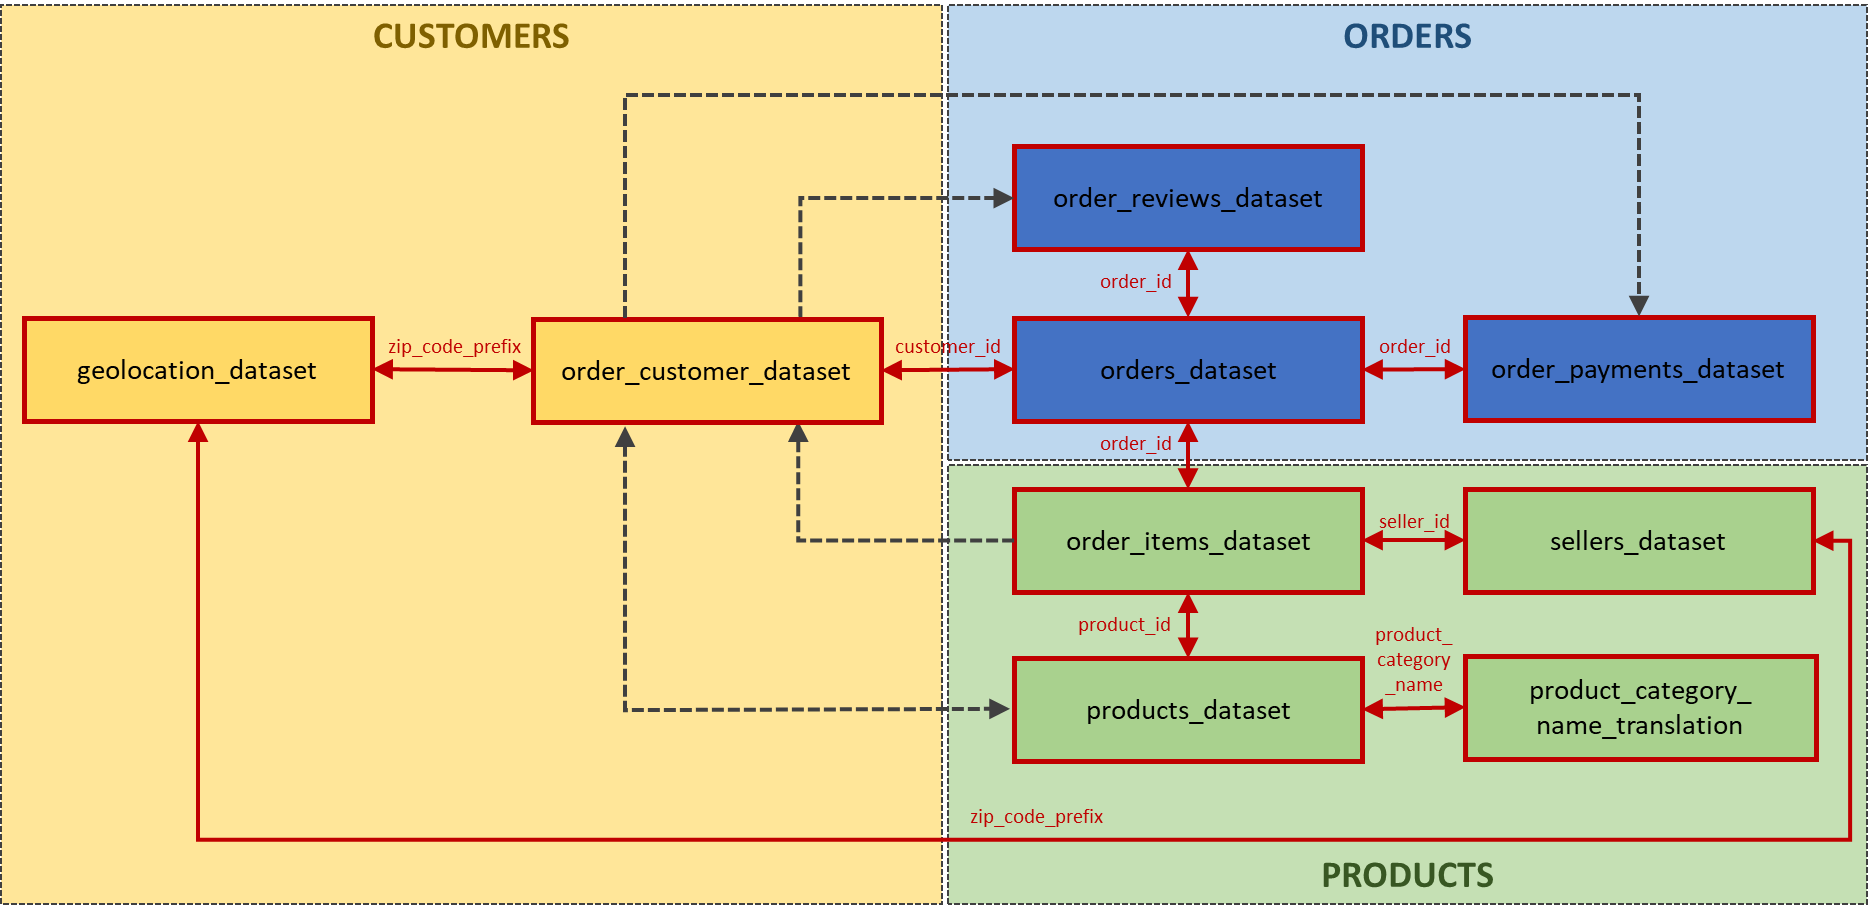

In [4]:
display_png(Image(".\P5_fig\P5_datasets_relations.png"))

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="dataset"></a>
## 2 - Constitution du jeu de données global

<a id="data_merging"></a>
### 3.1 - Fusion des fichiers de données
En partant du fichier 'olist_customers_dataset.csv', nous allons constituer le jeu de données par fusion de proche en proche avec les autres fichiers de données.

Cependant, nous ne considérons pas le fichier 'olist_geolocation_dataset.csv' dans cette fusion :
 - étant donné qu'à un client ou un vendeur correspond une seule localisation, mais qu'à un préfixe de code postal correspond un nombre important de lignes de ce fichier, nous ne pouvons pas considérer les coordonnées GPS (pour lesquelles nous n'avons pas la correspondance avec le client ou le vendeur) ;
 - de ce fait, les informations restantes (geolocation_zip_code_prefix, geolocation_city, geolocation_state) n'apportent aucune information qui ne soit déjà contenues par les fichiers de données sur les clients ou les vendeurs.

De plus, nous pouvons déjà identifier certaines variables non utiles ou devenant inutiles suite à la fusion et les éliminer du jeu de données :
- 'customer_id' : redondant avec 'order_id';
- 'order_approved_at' : niveau de détail inutile pour l'objet du projet ;
- 'order_delivered_carrier_date' : niveau de détail inutile pour l'objet du projet ;
- 'review_id' : redondant avec 'order_id';
- 'shipping_limit_date' : niveau de détail inutile pour l'objet du projet ;
- 'product_category_name' : variable remplacée par sa traduction en anglais.

In [5]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + f"Fusion des fichiers de données\n" + Style.RESET_ALL)

# Chargement de 'olist_customers_dataset.csv'
data = pd.read_csv(data_dir + "\\" + 'olist_customers_dataset.csv' , sep=',', encoding='utf-8-sig', index_col=None, low_memory=False)

# Liste des fichiers avec lesquels data sera fusionné en respectant l'ordre des relations
files = ['olist_orders_dataset.csv',
         'olist_order_reviews_dataset.csv',
         'olist_order_payments_dataset.csv',
         'olist_order_items_dataset.csv',
         'olist_products_dataset.csv',
         'product_category_name_translation.csv',
         'olist_sellers_dataset.csv']

# Liste des variables charnières dans l'ordre
lr_var = [['customer_id', 'customer_id'],
          ['order_id', 'order_id'],
          ['order_id', 'order_id'],
          ['order_id', 'order_id'],
          ['product_id', 'product_id'],
          ['product_category_name', 'product_category_name'],
          ['seller_id', 'seller_id']]

# Chargement de chaque fichier et fusion avec data
for file, var in zip(files, lr_var):
    df = pd.read_csv(data_dir + "\\" + file , sep=',', encoding='utf-8-sig', index_col=None, low_memory=False)
    data = data.merge(df, how='inner', left_on=var[0], right_on=var[1])
    print(Fore.GREEN + f"► Fusion avec '{file}' :" + Style.RESET_ALL, data.shape)
    display(data.head(1))

# Filtrage des variables inutiles
rm_list = ['customer_id', 'order_approved_at', 'order_delivered_carrier_date',
           'review_id', 'shipping_limit_date', 'product_category_name']
data = data.drop(labels=rm_list, axis=1).reset_index(drop=True)

# Affichage du jeu de données constitué
print(Fore.GREEN + f"► Jeu de données constitué :" + Style.RESET_ALL)
display(data.info())
display(data.head(5))

Fusion des fichiers de données

► Fusion avec 'olist_orders_dataset.csv' : (99441, 12)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00


► Fusion avec 'olist_order_reviews_dataset.csv' : (99224, 18)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40


► Fusion avec 'olist_order_payments_dataset.csv' : (103677, 22)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1,credit_card,2,146.87


► Fusion avec 'olist_order_items_dataset.csv' : (117329, 28)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1,credit_card,2,146.87,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88


► Fusion avec 'olist_products_dataset.csv' : (117329, 36)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1,credit_card,2,146.87,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0


► Fusion avec 'product_category_name_translation.csv' : (115609, 37)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1,credit_card,2,146.87,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture


► Fusion avec 'olist_sellers_dataset.csv' : (115609, 40)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1,credit_card,2,146.87,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP


► Jeu de données constitué :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_unique_id             115609 non-null  object 
 1   customer_zip_code_prefix       115609 non-null  int64  
 2   customer_city                  115609 non-null  object 
 3   customer_state                 115609 non-null  object 
 4   order_id                       115609 non-null  object 
 5   order_status                   115609 non-null  object 
 6   order_purchase_timestamp       115609 non-null  object 
 7   order_delivered_customer_date  113209 non-null  object 
 8   order_estimated_delivery_date  115609 non-null  object 
 9   review_score                   115609 non-null  int64  
 10  review_comment_title           13801 non-null   object 
 11  review_comment_message         48906 non-null   object 
 12  r

None

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,2017-06-05 00:00:00,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1,credit_card,2,146.87,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
1,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-28 00:09:50,2017-12-19 00:00:00,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUITO DO PRODUTO.",2017-11-29 00:00:00,2017-12-01 19:41:59,1,credit_card,1,275.79,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,112.99,24.90,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
2,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-28 00:09:50,2017-12-19 00:00:00,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUITO DO PRODUTO.",2017-11-29 00:00:00,2017-12-01 19:41:59,1,credit_card,1,275.79,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,112.99,24.90,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
3,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-26 09:54:04,2017-06-12 00:00:00,3,NaN,"Produto compatível com seu valor, muito bonito e barato, simples, mas um bom custo benefício.",2017-05-27 00:00:00,2017-05-28 02:43:16,1,credit_card,7,140.61,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,15.62,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
4,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-28 21:09:00,2018-03-22 00:00:00,4,NaN,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,1,credit_card,10,137.58,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,106.99,30.59,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP


[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="data_type"></a>
### 3.2 - Attribution d'un type de donnée à chaque variable
À partir du jeu de données constitué, nous allons à présent attribuer un type à chaque variable.

Finalement, le jeu est constitué de :
- 14 variables numériques ;
- 15 variables catégorielles ; et
- 5 variables de date.

In [6]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + f"Attribution des types pour chaque variable\n" + Style.RESET_ALL)

# Conversion des variables de type date
date_var = ['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date',
            'review_creation_date', 'review_answer_timestamp']
print(Fore.GREEN + f"► Conversion des variables de type date" + Style.RESET_ALL)
for var in date_var:
    data[var] = pd.to_datetime(data[var], errors='coerce')

# Conversion des variables de type 'object' en variables catégorielles
print(Fore.GREEN + f"► Conversion des variables de type 'object' en variables catégorielles" + Style.RESET_ALL)
for var in data.columns:
    if data[var].dtype==object:
        data[var] = data[var].astype('category')

# Conversions spécifiques
data['customer_zip_code_prefix'] = data['customer_zip_code_prefix'].astype('category')
data['seller_zip_code_prefix'] = data['seller_zip_code_prefix'].astype('category')
data['product_name_lenght'] = data['product_name_lenght'].astype('int64')
data['product_description_lenght'] = data['product_description_lenght'].astype('int64')
data['product_photos_qty'] = data['product_photos_qty'].astype('int64')

# Affichage du jeu de données
print(Fore.GREEN + f"► Jeu de données :" + Style.RESET_ALL)
display(data.info())

Attribution des types pour chaque variable

► Conversion des variables de type date
► Conversion des variables de type 'object' en variables catégorielles
► Jeu de données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_unique_id             115609 non-null  category      
 1   customer_zip_code_prefix       115609 non-null  category      
 2   customer_city                  115609 non-null  category      
 3   customer_state                 115609 non-null  category      
 4   order_id                       115609 non-null  category      
 5   order_status                   115609 non-null  category      
 6   order_purchase_timestamp       115609 non-null  datetime64[ns]
 7   order_delivered_customer_date  113209 non-null  datetime64[ns]
 8   order_estimated_delivery_date 

None

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="missings"></a>
### 3.3 - Traitement des valeurs manquantes
Les variables sont renseignées à l'exception des variables suivantes :
- la variable 'order_delivered_customer_date' pour laquelle nous fixons arbitrairement les valeurs manquantes à la valeur de 'order_estimated_delivery_date'.
- les 2 variables 'review_comment*' pour lesquelles un nombre importants de commentaires n'ont pas été renseignés ; nous n'exploiterons pas ces informations dans le cadre de ce projet.
- les 4 variables de dimensions des produits pour lesquelles il y a une valeur manquante ; nous fixons arbitrairement leurs valeurs à la valeur médiane de chaque variable.

In [7]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Valeurs manquantes\n" + Style.RESET_ALL)

# Remplacement des valeurs manquantes de ‘order_delivered_customer_date’ par ‘order_estimated_delivery_date’
data.loc[data['order_delivered_customer_date'].isnull(), 'order_delivered_customer_date'] =\
    data.loc[data['order_delivered_customer_date'].isnull(), 'order_estimated_delivery_date']

# Supression des variables 'review_comment_*'
data.drop(labels=['review_comment_title', 'review_comment_message'], axis=1, inplace=True)

# Traitement des manquants de dimensions produit
print(Fore.GREEN + "► Valeur manquante concernant les dimensions d'un produit :" + Style.RESET_ALL)
display(data.loc[data['product_weight_g'].isnull(), :])
data.loc[data['product_weight_g'].isnull(), 'product_weight_g'] = data['product_weight_g'].median()
data.loc[data['product_length_cm'].isnull(), 'product_length_cm'] = data['product_length_cm'].median()
data.loc[data['product_height_cm'].isnull(), 'product_height_cm'] = data['product_height_cm'].median()
data.loc[data['product_width_cm'].isnull(), 'product_width_cm'] = data['product_width_cm'].median()

Valeurs manquantes

► Valeur manquante concernant les dimensions d'un produit :


,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,review_score,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
104855,69b2b29382af03e03e486ad307a76000,90160,porto alegre,RS,85f8ad45e067abd694b627859fa57453,delivered,2017-01-29 21:40:02,2017-02-07 10:46:00,2017-03-08,5,2017-02-08,2017-02-09 10:09:24,1,credit_card,10,1961.0,1,09ff539a621711667c43eba6a3bd8466,8b8cfc8305aa441e4239358c9f6f2485,1934.0,27.0,60,865,3,NaN,NaN,NaN,NaN,baby,86020,londrina,PR


[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="dataset_filtering"></a>
### 3.4 - Filtrage des variables pour retenir celles utiles à la segmentation client
Notre objectif est de constituer un jeu de données sur les clients (une ligne par client) avec des features permettant de les caractériser.

L'examen du jeu de données montre que le jeu de données est centré sur les commandes et les seules autres informations sont :
- la localisation des clients, potentiellement utile, mais pas indispensable ;
- la localisation des vendeurs, avec un intérêt très limité pour notre projet.

Nous pourrons donc difficilement inclure dans notre segmentation des informations d'identification et caractérisation des clients (ex: données démographique, profession, etc), et devons donc orienter notre démarche vers leur comportement d'achat.

Dans cette démarche, nous donnons 3 niveaux d'importance aux variables :
- (a) variables minimales, nécessaires au projet, concernant le RFM (Récence, Fréquence et Montant) ;
- (b) variables potentiellement intéressantes pour la segmentation, relatives à la localisation des clients, à leur satisfaction, aux modes de paiement des commandes et aux produits achetés ;
- (c) autres variables, que nous ne conserverons pas.

S'agissant des **variables d'importance (a)**, nous retenons :
- L'identification des clients <font color='green'>'customer_unique_id'</font> et des commandes <font color='green'>'order_id'</font> pour la construction du jeu de données.
- Les variables nécessaires à la construction des 3 variables RFM (<font color='green'>'recency'</font>, <font color='green'>'frequency'</font> et <font color='green'>'monetary_value'</font>) : <font color='green'>'order_purchase_timestamp'</font> (pour identifier la plus récente), <font color='green'>'order_id'</font> (pour compter le nombre de commandes effectuées par chaque client), et <font color='green'>'price'</font> + <font color='green'>'freight_value'</font> (équivalent à <font color='green'>'payment_value'</font> mais correspond à l'unité du jeu qui est l'article). Nous aurons ici besoin de déterminer la *fenêtre de temps d'observation* que nous fixons entre les dates *min* et *max* de <font color='green'>order_purchase_timestamp</font>.

S'agissant des **variables d'importance (b)**, nous retenons :
- La *localisation des clients* avec la variable <font color='green'>'customer_state'</font> afin de limiter le nombre de catégories, compte tenu que les variables de localisation sont uniquement catégorielles.
- Le *nombre de commandes* effectuées avec la variable <font color='green'>'order_id'</font>.
- Le <font color='green'>'review_score'</font> afin de disposer d'une mesure de la *satisfaction des clients*, ainsi que, de manière complémentaire à fins d'investigations :
    - le délai de livraison comme la différence entre <font color='green'>'order_delivered_customer_date'</font> et <font color='green'>'order_purchase_timestamp'</font>,
    - le coût de la livraison <font color='green'>'freight_value'</font>, afin d'examiner l'impact de ce délai sur le review_score et les commandes,
    - la fiabilité du délai de livraison prévisionnel comme le rapport entre le délai réalisé et le délai prévisionnel.
- Les *informations relatives au paiement* : <font color='green'>'payment_sequential'</font>, <font color='green'>'payment_type'</font>, <font color='green'>'payment_installments'</font>.
- Les *informations relatives aux produits* commandés : <font color='green'>'product_id'</font> (pour le comptage du nombre de produits achetés), <font color='green'>'price'</font> + <font color='green'>'freight_value'</font> (pour le calcul du coût moyen des produits achetés) et <font color='green'>'product_category_name_english'</font> (pour la catégorie principale des produits achetés).

In [8]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Filtrage du jeu de données\n" + Style.RESET_ALL)

# Enregistrement des données pour le notebook4
fnb4 = ['customer_unique_id', 'order_id', 'order_purchase_timestamp', 'payment_value']
data[fnb4].drop_duplicates().to_csv(data_dir + "\\" + "data_nb4.csv", encoding='utf-8-sig', index=False, sep=';')

# Liste des variables à conserver
var_list = ['customer_unique_id', 'customer_state', 'order_id', 'order_purchase_timestamp',
            'order_estimated_delivery_date', 'order_delivered_customer_date', 'review_score',
            'payment_sequential', 'payment_installments', 'product_id', 'price',
            'freight_value', 'product_category_name_english']

# Suppression des autres variables
rm_list = list(set(data.columns.to_list()) - set(var_list))
data.drop(labels=rm_list, axis=1, inplace=True)

print(Fore.GREEN + "► Variables conservées :" + Style.RESET_ALL, data.columns.to_list())

Filtrage du jeu de données

► Variables conservées : ['customer_unique_id', 'customer_state', 'order_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_score', 'payment_sequential', 'payment_installments', 'product_id', 'price', 'freight_value', 'product_category_name_english']


[<font color='red'><em>retour sommaire</em></font>](#sommaire)

In [9]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Constitution du jeu de données clients\n" + Style.RESET_ALL)

# Initialisation du jeu de données client
data_customers = data.groupby(by='customer_unique_id', as_index=False)['customer_state'].first()
data_customers.set_index(keys='customer_unique_id', inplace=True)

# Variable de comptage des commandes et articles par client
df = data.groupby(by='customer_unique_id')['order_id'].nunique()
data_customers['order_count'] = df

# Fenêtre de temps des commandes
order_date_min = data['order_purchase_timestamp'].min()
order_date_max = data['order_purchase_timestamp'].max()
time_window = order_date_max - order_date_min
time_window = round((time_window.days + time_window.seconds / (24*3600)) / 365.25, 1)

# Variables 'recency'
df = data.groupby(by='customer_unique_id')['order_purchase_timestamp'].max()
data_customers['recency'] = order_date_max - df
data_customers['recency'] = data_customers['recency'].apply(lambda x: x.days + x.seconds/(24*3600))

# Variable 'frequency' (par année)
data_customers['frequency'] = data_customers['order_count'] / time_window

# Variable 'monetary'
df = data.groupby(by='customer_unique_id')[['price', 'freight_value']].sum()
data_customers['monetary'] = df['price'] + df['freight_value']

# Variable 'review_score'
df = data.drop_duplicates(subset='order_id').groupby(by='customer_unique_id')['review_score'].mean()
data_customers['review_score'] = df

# Variable 'order_delivery_lead_time'
data['order_delivery_lead_time'] = data['order_delivered_customer_date'] - data['order_purchase_timestamp']
df = data.drop_duplicates(subset='order_id').groupby(by='customer_unique_id')['order_delivery_lead_time'].mean()
data_customers['order_delivery_lead_time'] = df
data_customers['order_delivery_lead_time'] = data_customers['order_delivery_lead_time'].apply(lambda x: x.days + x.seconds/(24*3600))

# Variable 'order_delivery_accuracy'
data['order_delivery_accuracy'] = (data['order_delivered_customer_date'] - data['order_purchase_timestamp']) /\
                                  (data['order_estimated_delivery_date'] - data['order_purchase_timestamp'])
df = data.drop_duplicates(subset='order_id').groupby(by='customer_unique_id')['order_delivery_accuracy'].mean()
data_customers['order_delivery_accuracy'] = df

# Variable 'freight_value'
df = data.groupby(by='customer_unique_id')['freight_value'].mean()
data_customers['freight_value'] = df

# Variable 'payment_sequential'
df = data.groupby(by='customer_unique_id')['payment_sequential'].max()
data_customers['payment_sequential'] = df.apply(lambda x: 1 if x>1 else 0).astype('category')
data_customers['payment_sequential'] = pd.Categorical(data_customers['payment_sequential'], categories=[0, 1], ordered=True)

# Variable 'payment_installments'
df = data.groupby(by='customer_unique_id')['payment_installments'].max()
data_customers['payment_installments'] = df.apply(lambda x: 1 if x>1 else 0).astype('category')
data_customers['payment_installments'] = pd.Categorical(data_customers['payment_installments'], categories=[0, 1], ordered=True)

# Variable de comptage des articles par commande client
df = data.groupby(by='customer_unique_id')['product_id'].count()
data_customers['product_mean_count'] = df / data_customers['order_count']

# Variable 'product_mean_value'
df = data.groupby(by='customer_unique_id')[['price', 'freight_value']].mean()
data_customers['product_mean_value'] = df['price'] + df['freight_value']

# Variable 'product_category'
df = data.groupby(by='customer_unique_id', as_index=False)['product_category_name_english'].value_counts()
df = df.groupby(by='customer_unique_id')['product_category_name_english'].first()
data_customers['product_category'] = df

print(Fore.GREEN + "► Jeu de données client :" + Style.RESET_ALL, data_customers.shape)
display(pd.concat([data_customers.head(5), data_customers.loc[data_customers['order_count']>5], data_customers.tail(5)], axis=0))

Constitution du jeu de données clients

► Jeu de données client : (93396, 14)


,customer_state,order_count,recency,frequency,monetary,review_score,order_delivery_lead_time,order_delivery_accuracy,freight_value,payment_sequential,payment_installments,product_mean_count,product_mean_value,product_category
customer_unique_id,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,SP,1,115.924,0.5,141.90,5.000,6.411,0.608,12.000,0,1,1.000,141.900,bed_bath_table
0000b849f77a49e4a4ce2b2a4ca5be3f,SP,1,118.914,0.5,27.19,4.000,3.286,0.436,8.290,0,0,1.000,27.190,health_beauty
0000f46a3911fa3c0805444483337064,SC,1,541.501,0.5,86.22,3.000,25.732,0.949,17.220,0,1,1.000,86.220,stationery
0000f6ccb0745a6a4b88665a16c9f078,PA,1,325.526,0.5,43.62,4.000,20.037,0.643,17.630,0,1,1.000,43.620,telephony
0004aac84e0df4da2b147fca70cf8255,SP,1,292.556,0.5,196.89,5.000,13.141,0.651,16.890,0,1,1.000,196.890,telephony
12f5d6e1cbf93dafd9dcc19095df0b3d,PR,6,605.737,3.0,110.72,5.000,11.546,0.346,8.720,0,0,1.000,18.453,furniture_bedroom
1b6c7548a2a1f9037c1fd3ddfed95f33,MG,7,200.823,3.5,1021.12,5.000,13.332,0.518,16.591,1,0,1.429,102.112,furniture_decor
3e43e6105506432c953e165fb2acf44c,SP,9,187.604,4.5,1172.67,2.778,14.129,0.614,12.273,0,1,1.556,83.762,bed_bath_table
47c1a3033b8b77b3ab6e109eb4d5fdf3,SP,6,221.744,3.0,997.32,4.833,12.769,0.604,15.340,0,0,1.333,124.665,auto


<a id="customer_dataset"></a>
### 3.4 - Constitution du jeu de données clients
Le jeu cible est placé dans le DataFrame 'data_customers'.

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="univar"></a>
## 4 - Analyse univariée
L'analyse univariée met en évidence les points suivants :
- Avec seulement 3% des clients qui passent plus d'une commande, l'immense majorité des clients n'a passé qu'une seule commande au cours des 2 années de la période d'observation. Cela se traduit par une faible fréquence d'achat (0.5 par an en moyenne) et une récence élevée (242 jours en moyenne). Le nombre de clients ayant passé plusieurs commandes diminue très rapidement au-deà de 2 commande pour passer sous la barre des 10 clients pour 5 commandes.
&nbsp;
- La récence sépare la population des clients en 2 groupes : ceux qui ont commandé au cours des 600 derniers jours (à la date de fin d'observation du jeu de données), et ceux qui n'ont pas effectué de commande depuis plus de 690 jours environ, ces derniers représentant une petite population de 334 clients (0.36%).
&nbsp;
- Avec un coefficient de dispersion (ecart type / moyenne) de 1.51, le montant dépensé par client varie de manière importante autour de 174 reals, avec des articles dont la valeur moyenne est de 146 reals. Moins de 6.31% des clients ont dépensé plus de 437 reals et moins de 2.86% ont dépensé plus de 700 reals ; au-delà de 6000 réal, cela ne représente que 0.02% des clients.
&nbsp;
- 20% des catégories de produit (15 sur 71) représentent plus de 80% des commandes, mais nous ne constatons pas une ou plusieurs catégories qui se détacheraient sensiblement.
&nbsp;
- 77% des clients sont très satisfaits (score ≥ 4) et un peu moins de 15% sont insatisfaits (score < 3).
&nbsp;
- 80% des commandes sont livrées sous 18 jours ; ce n'est pas un score particulièrement performant alors que près de 80% des clients sont très satisfait ; il nous faudra examiner plus avant l'éventuelle corrélation de cette variable avec le review_score pour conclure sur son impact potentiel sur la satisfaction client. Le rapport du délai de livraison effectif sur le délai prévisionnel montre que le délai prévisionnel est largement surestimé (80% des cas) et non maitrisé pour les délais longs ; cette variable ne semble pas apporter davantage d'information que 'order_delivery_lead_time'. 99% des commandes sont livrées sous 46 jours et les livraisons au-delà de 80 jours touchent moins d'une centaine de clients.
&nbsp;
- 3.1% des clients utilisent plusieurs moyens de paiement pour régler une même commande.
&nbsp;
- Le recours à plusieurs termes de paiement est très répandu et touche un peu plus de la moitié des clients.
&nbsp;
- Les clients sont localisés dans 27 Etats, parmi lesquels :
  - plus de 40% des clients sont localisés dans l'Etat de Sao Paulo,
  - 2/3 des clients sont localisés dans 3 Etats (Sao Paulo, Rio de Janeiro et Mato Grosso),
  - plus de 80% des clients sont localisés dans 6 Etats.
Il semble donc que nous pourrions réduire le nombre de catégories de cette variable à 3 ou 6 Etats, plus une catégorie pour l'ensemble des autres Etats.

<a id="describe"></a>
### 4.1 - Valeurs statistiques

In [10]:
# Examen statistique - Describe
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Examen statistique\n" + Style.RESET_ALL)

# Description des variables numériques
print(Fore.GREEN + "► Variables numériques :" + Style.RESET_ALL)
display(data_customers.describe(include=np.number))

# Description des variables catégorielles
print(Fore.GREEN + "► Variables catégorielles :" + Style.RESET_ALL)
display(data_customers.describe(include='category'))

Examen statistique

► Variables numériques :


,order_count,recency,frequency,monetary,review_score,order_delivery_lead_time,order_delivery_accuracy,freight_value,product_mean_count,product_mean_value
count,93396.000,93396.000,93396.000,93396.000,93396.000,93396.000,93396.000,93396.000,93396.000,93396.000
mean,1.033,242.388,0.517,174.135,4.105,12.794,0.550,20.259,1.191,146.636
std,0.208,153.164,0.104,263.117,1.325,9.677,0.383,15.851,0.711,197.257
min,1.000,0.000,0.500,10.070,1.000,0.533,0.024,0.000,1.000,9.341
25%,1.000,118.488,0.500,64.000,4.000,6.850,0.322,13.370,1.000,57.850
50%,1.000,222.823,0.500,110.440,5.000,10.369,0.460,16.440,1.000,96.610
75%,1.000,351.475,0.500,189.000,5.000,16.048,0.668,21.260,1.000,163.250
max,15.000,728.494,7.500,13664.080,5.000,208.352,13.029,409.680,38.000,6929.310


► Variables catégorielles :


,customer_state,payment_sequential,payment_installments,product_category
count,93396,93396,93396,93396
unique,27,2,2,71
top,SP,0,1,bed_bath_table
freq,39184,90505,48279,8804


[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="orders"></a>
### 4.2 - Examen du nombre ou fréquence des commandes par client

Examen du nombre (ou fréquence) de commandes par client

► Représentation graphique de la distribution :


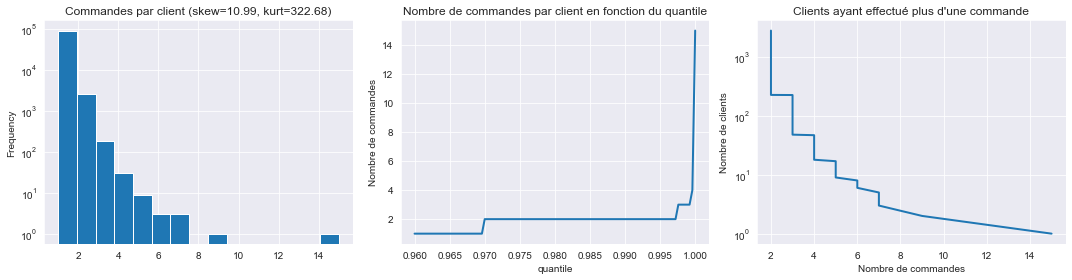

► % de clients ayant passé plus d'une commande : 3.01%



In [11]:
# Examen du nombre de commandes
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Examen du nombre (ou fréquence) de commandes par client\n" + Style.RESET_ALL)

# Représentations graphiques
print(Fore.GREEN + "► Représentation graphique de la distribution :" + Style.RESET_ALL)
fig = plt.figure(figsize=(15,4))

# Histogramme du nombre de commandes par client
plt.subplot(131)
title = f"Commandes par client (skew={data_customers['order_count'].skew():.2f}, kurt={data_customers['order_count'].kurtosis():.2f})"
data_customers['order_count'].plot(kind='hist', bins=15, logy=True, title=title)

plt.subplot(132)
x = np.linspace(0.96, 1, 101)
y = np.array([])
for q in x:
    y = np.append(y, data_customers['order_count'].quantile(q=q))
plt.plot(x, y, lw=2)
plt.xlabel("quantile")
plt.title("Nombre de commandes par client en fonction du quantile")
plt.ylabel(ylabel="Nombre de commandes")

# Clients ayant effectué plus d'une commande
plt.subplot(133)
ar = np.sort(data_customers['order_count'].values)[::-1]
df = pd.DataFrame(data=ar, columns=['order_count'])
from scipy import stats
q = 100 - stats.percentileofscore(data_customers['order_count'], score=1, kind='weak')
df = df[df>data_customers['order_count'].quantile(q=q/100)].dropna().reset_index(drop=True)
plt.plot(df.values, np.array(df.index)+1, lw=2)
plt.xlabel("Nombre de commandes")
plt.gca().set_yscale('log')
plt.ylabel("Nombre de clients")
plt.title("Clients ayant effectué plus d'une commande")

plt.tight_layout()
plt.show()

# Clients avec plus d'une commande
print(Fore.GREEN + "► % de clients ayant passé plus d'une commande :" + Style.RESET_ALL,
      f"{q:.2f}%\n")

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="recency"></a>
### 4.3 - Examen de la récence des commandes par client

Examen de la récence des commandes par client

► Représentation graphique de la distribution :


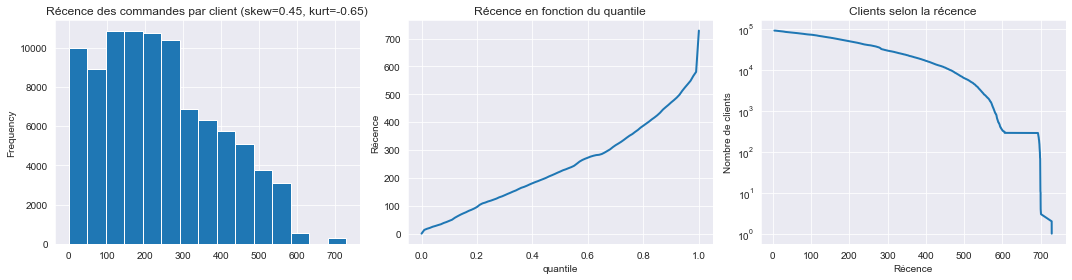

► Nombre de clients ayant passé une commande de récence > 600 jours : 334 → 0.36%



In [12]:
# Examen de la récence des commandes
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Examen de la récence des commandes par client\n" + Style.RESET_ALL)

# Représentations graphiques
print(Fore.GREEN + "► Représentation graphique de la distribution :" + Style.RESET_ALL)
fig = plt.figure(figsize=(15,4))

# Histogramme du nombre de commandes par client
plt.subplot(131)
title = f"Récence des commandes par client (skew={data_customers['recency'].skew():.2f}, kurt={data_customers['recency'].kurtosis():.2f})"
data_customers['recency'].plot(kind='hist', bins=15, logy=False, title=title)

# Récence en fonction du quantile
plt.subplot(132)
x = np.linspace(0, 1, 101)
y = np.array([])
for q in x:
    y = np.append(y, data_customers['recency'].quantile(q=q))
plt.plot(x, y, lw=2)
plt.xlabel("quantile")
plt.title("Récence en fonction du quantile")
plt.ylabel(ylabel="Récence")

# Nombre de clients en fonction de la récence
plt.subplot(133)
ar = np.sort(data_customers['recency'].values)[::-1]
df = pd.DataFrame(data=ar, columns=['dlt'])
df = df[df>data_customers['recency'].quantile(q=0)].dropna().reset_index(drop=True)
plt.plot(df.values, np.array(df.index)+1, lw=2)
plt.xlabel("Récence")
plt.gca().set_yscale('log')
plt.ylabel("Nombre de clients")
plt.title("Clients selon la récence")

plt.tight_layout()
plt.show()

# Clients avec plus d'une commande
print(Fore.GREEN + "► Nombre de clients ayant passé une commande de récence > 600 jours :" + Style.RESET_ALL,
      f"{len(df[df>600].dropna()):.0f} → {100*len(df[df>600].dropna())/len(data_customers):.2f}%\n")

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="monetary"></a>
### 4.4 - Examen du montant des commandes par client

Examen du montant des commandes par client

► Représentation graphique des distribution :


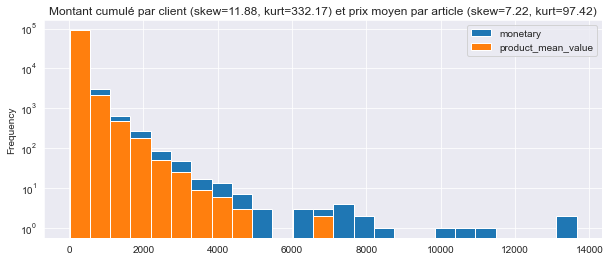

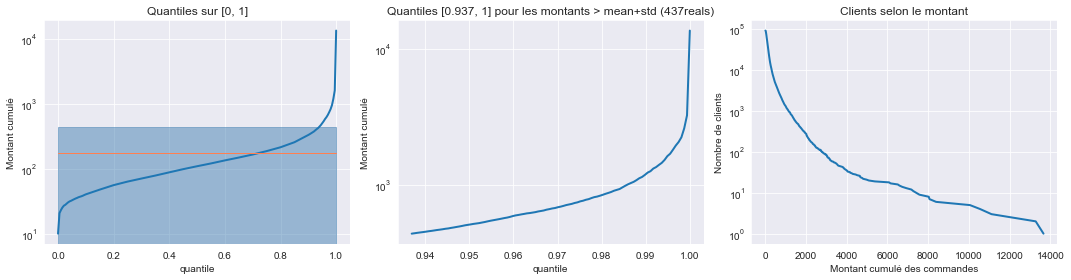

► % de clients ayant dépensé plus que la moyenne + écart type (437 reals) : 6.31%
► % de clients ayant dépensé plus que la moyenne + 2 écart type (700 reals) : 2.86%
► % de clients ayant dépensé plus de 6000 reals : 0.02%
► Montant moyen dépensé par client, sous le seuil de 6000 reals : 172.54


In [13]:
# Examen des montants de commande
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Examen du montant des commandes par client\n" + Style.RESET_ALL)

# Représentations graphiques
print(Fore.GREEN + "► Représentation graphique des distribution :" + Style.RESET_ALL)

# Montant cumulé des commandes par client et montant moyen des articles commandés
title = f"Montant cumulé par client (skew={data_customers['monetary'].skew():.2f}, kurt={data_customers['monetary'].kurtosis():.2f}) et prix moyen par article (skew={data_customers['product_mean_value'].skew():.2f}, kurt={data_customers['product_mean_value'].kurtosis():.2f})"
data_customers[['monetary', 'product_mean_value']].plot(kind='hist', bins=25, figsize=(10,4), title=title, legend=True, logy=True)

# Montant cumulé des commandes en fonction du quantile
fig = plt.figure(figsize=(15, 4))
plt.subplot(131)
x = np.concatenate([np.linspace(0, 0.1, 20), np.linspace(0.1, 0.9, 17), np.linspace(0.9, 1, 21)])
y = np.array([])
for q in x:
    y = np.append(y, data_customers['monetary'].quantile(q=q))

# Ensemble des quantiles
plt.plot(x, y, lw=2)
mean = data_customers['monetary'].mean()
std = max(data_customers['monetary'].std(), 0)
plt.plot([0,1], [mean, mean], lw=1, c='coral')
plt.fill_between([0,1], [mean+std, mean+std], [mean-std, mean-std], color='steelblue', alpha=0.5)
plt.xlabel("quantile")
plt.gca().set_yscale('log')
plt.ylabel(ylabel="Montant cumulé")
plt.title("Quantiles sur [0, 1]")

# Zoom au-dessus de mean+std
qmin = stats.percentileofscore(data_customers['monetary'], score=mean+std, kind='weak') / 100
x = np.linspace(qmin, 1, 100)
y = np.array([])
for q in x:
    y = np.append(y, data_customers['monetary'].quantile(q=q))
plt.subplot(132)
plt.plot(x, y, lw=2)
plt.xlabel("quantile")
plt.gca().set_yscale('log')
plt.ylabel(ylabel="Montant cumulé")
plt.title(f"Quantiles [{qmin:.3f}, 1] pour les montants > mean+std ({mean+std:.0f}reals)")


# Nombre de clients en fonction du montant cumulé des commandes
plt.subplot(133)
ar = np.sort(data_customers['monetary'].values)[::-1]
df = pd.DataFrame(data=ar, columns=['dlt'])
df = df[df>data_customers['monetary'].quantile(q=0)].dropna().reset_index(drop=True)
plt.plot(df.values, np.array(df.index)+1, lw=2)
plt.xlabel("Montant cumulé des commandes")
plt.gca().set_yscale('log')
plt.ylabel("Nombre de clients")
plt.title("Clients selon le montant")

plt.tight_layout()
plt.show()

# Points caractéristiques
print(Fore.GREEN + f"► % de clients ayant dépensé plus que la moyenne + écart type ({mean+std:.0f} reals) :"
      + Style.RESET_ALL, f"{100*(1-qmin):.2f}%")
print(Fore.GREEN + f"► % de clients ayant dépensé plus que la moyenne + 2 écart type ({mean+2*std:.0f} reals) :"
      + Style.RESET_ALL, f"{100-stats.percentileofscore(data_customers['monetary'], score=mean+2*std, kind='weak'):.2f}%")
print(Fore.GREEN + "► % de clients ayant dépensé plus de 6000 reals :" + Style.RESET_ALL,
      f"{100 - stats.percentileofscore(data_customers['monetary'], score=6000, kind='strict'):.2f}%")
print(Fore.GREEN + "► Montant moyen dépensé par client, sous le seuil de 6000 reals :" + Style.RESET_ALL,
      f"{data_customers.loc[data_customers['monetary']<6000, 'monetary'].mean():.2f}")

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="product"></a>
### 4.5 - Examen des catégories de produits commandées

Examen des catégories de produits commandés

► Représentation graphique de la distribution :


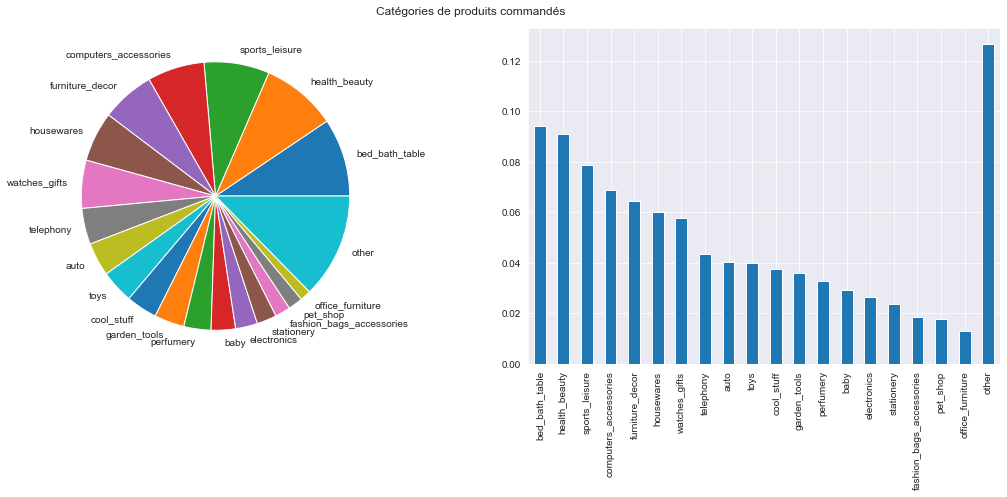

► Nombre de catégories représentant plus de 80% des commandes : 15



In [14]:
# Examen des catégories de produits commandés
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Examen des catégories de produits commandés\n" + Style.RESET_ALL)
print(Fore.GREEN + "► Représentation graphique de la distribution :" + Style.RESET_ALL)

# Constitue un dataframe avec les cat_nbr premières catégories et une catégorie 'other' pour le reste
cat_nbr = 19
df = data_customers['product_category'].value_counts(normalize=True, sort=True, ascending=False).iloc[0:cat_nbr]
df['other'] = data_customers['product_category'].value_counts(normalize=True,sort=True, ascending=False).iloc[cat_nbr:].sum()

# Représentation graphique combinée secteurs + barres
fig = plt.figure(figsize=(15,7))
plt.subplot(121)
df.plot(kind='pie')
plt.ylabel(ylabel=None)
plt.subplot(122)
df.plot(kind='bar')
fig.suptitle("Catégories de produits commandés")
plt.tight_layout()
plt.show()

# Nombre de catégories pour plus de 80% des commandes
df = data_customers['product_category'].value_counts(normalize=True, sort=True, ascending=False).cumsum() < 0.8
print(Fore.GREEN + "► Nombre de catégories représentant plus de 80% des commandes :" + Style.RESET_ALL, f"{df.sum()+1}\n")

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="satisfaction"></a>
### 4.6 - Examen de la satisfaction des clients

Examen de la satisfaction des clients

► Représentation graphique :


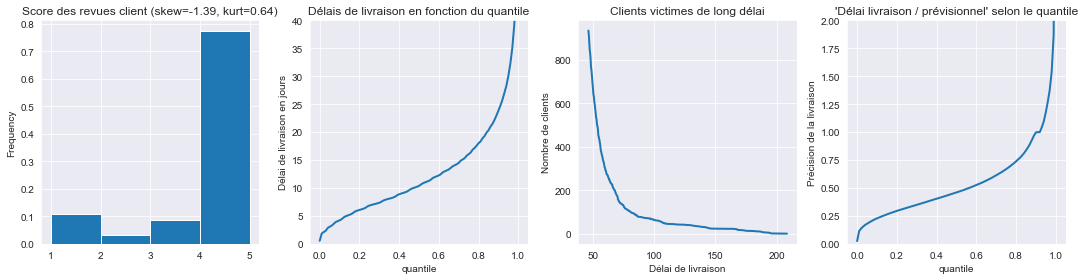

► 77% des clients sont très satisfaits (score ≥ 4) 
► 99% des commandes sont livrées sous 46 jours (voir la courbe au-delà)
► 80% des commandes sont livrées sous 18 jours
► 90.1% des commandes sont livrées en avance et 9.9% en retard par rapport à la date prévisionnelle



In [15]:
# Examen de la satisfaction des clients
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Examen de la satisfaction des clients\n" + Style.RESET_ALL)

# Représentations graphiques
print(Fore.GREEN + "► Représentation graphique :" + Style.RESET_ALL)
fig = plt.figure(figsize=(15,4))

# Histogramme des scores de revue
plt.subplot(141)
title = f"Score des revues client (skew={data_customers['review_score'].skew():.2f}, kurt={data_customers['review_score'].kurtosis():.2f})"
data_customers['review_score'].plot(kind='hist', density=True, bins=4, title=title, grid=True)

# Délai de livraison en fonction du quantile
plt.subplot(142)
x = np.linspace(0, 1, 101)
y = np.array([])
for q in x:
    y = np.append(y, data_customers['order_delivery_lead_time'].quantile(q=q))
plt.plot(x, y, lw=2)
plt.ylim(top=40, bottom=0)
plt.xlabel("quantile")
plt.ylabel("Délai de livraison en jours")
plt.title("Délais de livraison en fonction du quantile")

# Nombre de clients en fonction du délai de livraison
plt.subplot(143)
ar = np.sort(data_customers['order_delivery_lead_time'].values)[::-1]
df = pd.DataFrame(data=ar, columns=['dlt'])
df = df[df>data_customers['order_delivery_lead_time'].quantile(q=0.99)].dropna().reset_index(drop=True)
plt.plot(df.values, np.array(df.index)+1, lw=2)
plt.xlabel("Délai de livraison")
plt.ylabel("Nombre de clients")
plt.title("Clients victimes de long délai")

# Délai de livraison en fonction du quantile
plt.subplot(144)
x = np.linspace(0, 1, 101)
y = np.array([])
for q in x:
    y = np.append(y, data_customers['order_delivery_accuracy'].quantile(q=q))
plt.plot(x, y, lw=2)
plt.ylim(top=2, bottom=0)
plt.xlabel("quantile")
plt.ylabel("Précision de la livraison")
plt.title("'Délai livraison / prévisionnel' selon le quantile")
plt.grid(visible=True)
plt.tight_layout()
plt.show()

# Points caractéristiques
print(Fore.GREEN + f"► {100 - stats.percentileofscore(data_customers['review_score'], score=4, kind='strict'):.0f}%"
                   f" des clients sont très satisfaits (score ≥ 4) " + Style.RESET_ALL)
print(Fore.GREEN + f"► 99% des commandes sont livrées sous {data_customers['order_delivery_lead_time'].quantile(q=0.99):.0f} jours (voir la courbe au-delà)"
      + Style.RESET_ALL)
print(Fore.GREEN + f"► 80% des commandes sont livrées sous {data_customers['order_delivery_lead_time'].quantile(q=0.8):.0f} jours"
      + Style.RESET_ALL)
pc_early = stats.percentileofscore(data_customers['order_delivery_accuracy'], score=1, kind='strict')
pc_late = 100 - stats.percentileofscore(data_customers['order_delivery_accuracy'], score=1, kind='strict')
print(Fore.GREEN
      + f"► {pc_early:.1f}% des commandes sont livrées en avance et {pc_late:.1f}% en retard par rapport à la date prévisionnelle\n"
      + Style.RESET_ALL)

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="payment"></a>
### 4.7 - Examen des modes de paiement

Examen des modes de paiement



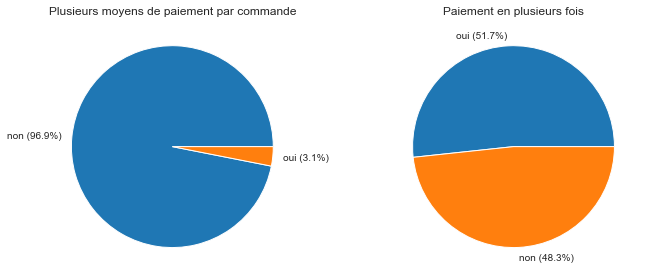

In [16]:
# Examen des modes de paiement
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Examen des modes de paiement\n" + Style.RESET_ALL)
fig = plt.figure(figsize=(10,4))
plt.subplot(121)
title = "Plusieurs moyens de paiement par commande"
df = data_customers['payment_sequential'].value_counts(normalize=True, sort=True, ascending=False)
df.plot(kind='pie', title=title, labels=[f"non ({100*df[0]:.1f}%)", f"oui ({100*df[1]:.1f}%)"])
plt.ylabel(ylabel=None)
plt.subplot(122, sharey=plt.gca())
title = "Paiement en plusieurs fois"
df = data_customers['payment_installments'].value_counts(normalize=True, sort=True, ascending=False)
df.plot(kind='pie', title=title, labels=[f"oui ({100*df[1]:.1f}%)", f"non ({100*df[0]:.1f}%)"])
plt.tight_layout()
plt.show()

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="localisation"></a>
### 4.8 - Examen de la localisation des clients

Examen de la localisation des clients

► Représentation graphique de la distribution sur les Etats :


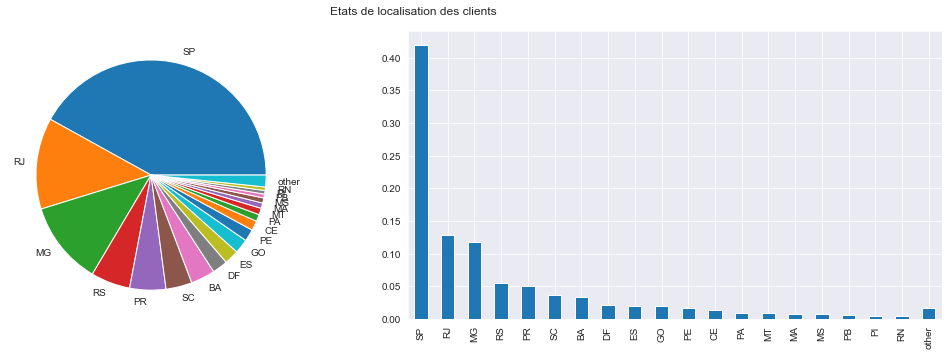

► Nombre d'Etats dans lesquels sont localisés plus de 80% des clients : 6
► % clients dans les 3 premiers Etats : 66.5%



In [17]:
# Examen de la localisation des clients
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Examen de la localisation des clients\n" + Style.RESET_ALL)
print(Fore.GREEN + "► Représentation graphique de la distribution sur les Etats :" + Style.RESET_ALL)

# Constitue un dataframe avec les cat_nbr premières catégories et une catégorie 'other' pour le reste
cat_nbr = 19
df = data_customers['customer_state'].value_counts(normalize=True, sort=True, ascending=False).iloc[0:cat_nbr]
df['other'] = data_customers['customer_state'].value_counts(normalize=True,sort=True, ascending=False).iloc[cat_nbr:].sum()
# Représentation graphique combinée secteurs + barres
fig = plt.figure(figsize=(15,5))
plt.subplot(121)
df.plot(kind='pie')
plt.ylabel(ylabel=None)
plt.subplot(122)
df.plot(kind='bar')
fig.suptitle("Etats de localisation des clients")
plt.tight_layout()
plt.show()

# Nombre de catégories pour plus de 80% des commandes
df = data_customers['customer_state'].value_counts(normalize=True, sort=True, ascending=False).cumsum() < 0.8
print(Fore.GREEN + "► Nombre d'Etats dans lesquels sont localisés plus de 80% des clients :" + Style.RESET_ALL, f"{df.sum()+1}")

# % clients dans les 3 premiers Etats
df = data_customers['customer_state'].value_counts(normalize=True, sort=True, ascending=False).cumsum()
print(Fore.GREEN + "► % clients dans les 3 premiers Etats :" + Style.RESET_ALL, f"{100*df[2]:.1f}%\n")

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="multivar"></a>
## 5 - Analyse multivariée
Dans ce chapitre, nous examinons les liens potentiels entre les variables : les variables numériques entre elles et les variables numériques avec les variables catégorielles.

In [18]:
# Liste des variables catégorielles et numériques
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Liste des variables numériques et catégorielles\n" + Style.RESET_ALL)
cat_var = []
for var in data_customers.columns:
    if data_customers[var].dtypes=='category':
        cat_var.append(var)
num_var = list(set(data_customers.columns.to_list()) - set(cat_var))
print(Fore.GREEN + "► Variables numériques: " + Style.RESET_ALL, num_var, '\n')
print(Fore.GREEN + "► Variables catégorielles: " + Style.RESET_ALL, cat_var)

Liste des variables numériques et catégorielles

► Variables numériques:  ['order_delivery_accuracy', 'recency', 'review_score', 'frequency', 'monetary', 'product_mean_count', 'freight_value', 'order_delivery_lead_time', 'order_count', 'product_mean_value'] 

► Variables catégorielles:  ['customer_state', 'payment_sequential', 'payment_installments', 'product_category']


<a id="mv_num"></a>
### 5.1 - Variables numériques entre elles
L'analyse des corrélations entre les variables numériques montre les points suivants :
- Les variables 'monetary', 'product_mean_count' et 'product_mean_value' sont liées. En effet, l'analyse univariée a montré que la plupart des commandes ne contiennent qu'un article (percentile > 75%) et que la plupart des clients n'ont passé qu'une seule commande (97%). Nous n'aurons donc pas intérêt à conserver les variables 'product_mean_count' et 'product_mean_value' pour les algorithmes de clustering et les supprimons en conséquence du jeu de données client.
&nbsp;
- Les variables 'order_count' et 'frequency' sont homothétiques avec un facteur 2. Nous supprimons en conséquence 'order_count' du jeu de données client.
&nbsp;
- Les variables 'review_score' et 'order_delivery_lead_time' sont corrélées : l'examen du nuage de points montre que l'augmentation du délai impacte négativement le score et que cet impact s'accroit avec l'allongement du délai. La variable 'order_delivery_lead_time' a donc une contribution dans l'explication de la satisfaction des clients.
&nbsp;
- Les variables 'order_delivery_lead_time' et 'order_delivery_accuracy' sont fortement corrélées, mais cette dernière variable n'apporte pas de valeur ajoutée dans l'explication du 'review_score' ni pour les autres variables.
&nbsp;
- Le coût de livraison a une tendance croissante en fonction de la valeur du produit et du délai de livraison. Nous pourrions donc conserver 'order_delivery_lead_time' au détriment des 2 autres variables, car c'est celle qui explique le mieux la satisfaction client en étant la mieux corrélée à 'review_score'.

  → Liste des 7 paires dont la corrélation est supérieure à 0.35 :


[['frequency', 'order_count'],
 ['monetary', 'freight_value'],
 ['monetary', 'product_mean_value'],
 ['review_score', 'order_delivery_lead_time'],
 ['review_score', 'order_delivery_accuracy'],
 ['order_delivery_lead_time', 'order_delivery_accuracy'],
 ['freight_value', 'product_mean_value']]

  → Table des corrélations :


,recency,frequency,order_count,monetary,review_score,order_delivery_lead_time,order_delivery_accuracy,freight_value,product_mean_count,product_mean_value
recency,1.00,-0.02,-0.02,0.00,-0.02,0.12,-0.02,-0.04,0.01,0.00
frequency,-0.02,1.00,1.00,0.13,0.01,-0.00,-0.01,-0.01,0.04,-0.02
order_count,-0.02,1.00,1.00,0.13,0.01,-0.00,-0.01,-0.01,0.04,-0.02
monetary,0.00,0.13,0.13,1.00,-0.04,0.07,0.02,0.41,0.31,0.82
review_score,-0.02,0.01,0.01,-0.04,1.00,-0.36,-0.36,-0.04,-0.09,-0.02
order_delivery_lead_time,0.12,-0.00,-0.00,0.07,-0.36,1.00,0.81,0.22,-0.01,0.08
order_delivery_accuracy,-0.02,-0.01,-0.01,0.02,-0.36,0.81,1.00,0.08,-0.02,0.03
freight_value,-0.04,-0.01,-0.01,0.41,-0.04,0.22,0.08,1.00,-0.02,0.49
product_mean_count,0.01,0.04,0.04,0.31,-0.09,-0.01,-0.02,-0.02,1.00,-0.04
product_mean_value,0.00,-0.02,-0.02,0.82,-0.02,0.08,0.03,0.49,-0.04,1.00


► Représentation de la paire:  ['product_mean_value', 'freight_value']


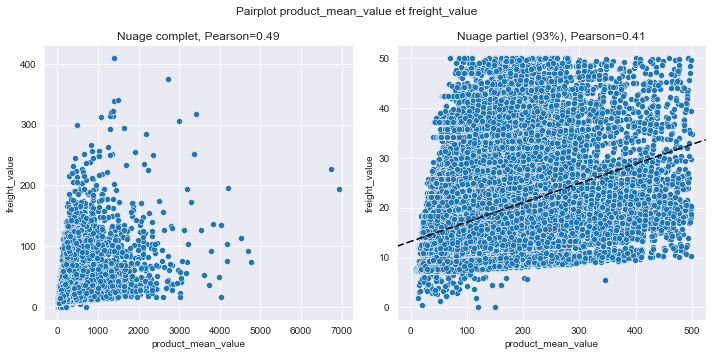

► Représentation de la paire:  ['order_delivery_lead_time', 'freight_value']


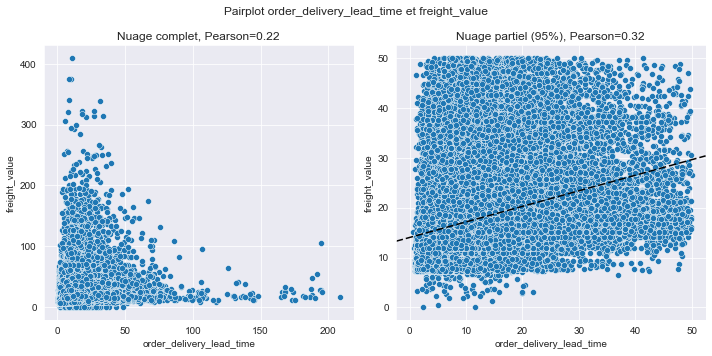

► Représentation de la paire:  ['order_delivery_lead_time', 'order_delivery_accuracy']


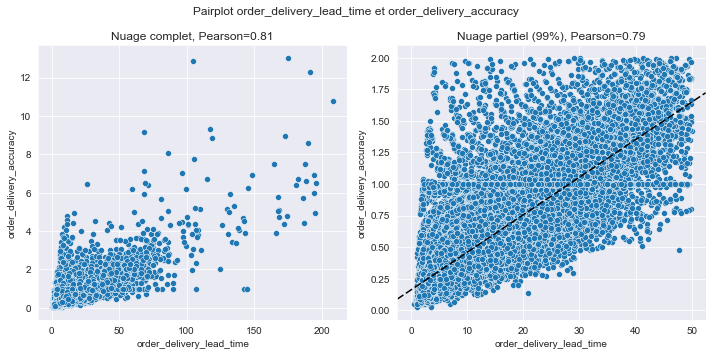

► Représentation de la paire:  ['order_delivery_lead_time', 'review_score']


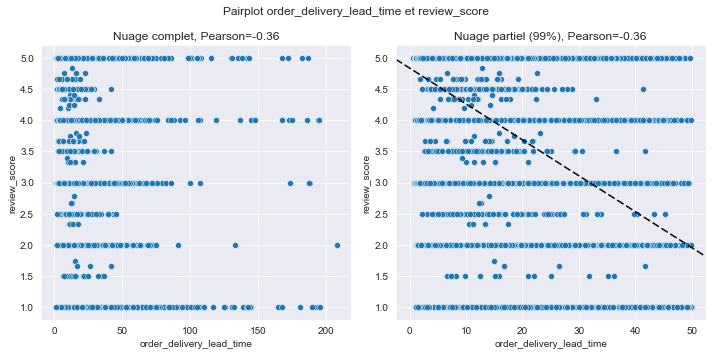

In [19]:
# Table des corrélations
fct.threshold = 0.35
features = ['recency', 'frequency',  'order_count', 'monetary', 'review_score', 'order_delivery_lead_time',
            'order_delivery_accuracy', 'freight_value', 'product_mean_count', 'product_mean_value']

fct.cor_table(data_customers, features)

# Représentation graphique des paires intéressantes
print(Fore.GREEN + "► Représentation de la paire: " + Style.RESET_ALL, "['product_mean_value', 'freight_value']")
fct.pair_plot(data_customers, ['product_mean_value', 'freight_value'], exclude_y=0, xmax=500, ymax=50, sharey=False)

print(Fore.GREEN + "► Représentation de la paire: " + Style.RESET_ALL, "['order_delivery_lead_time', 'freight_value']")
fct.pair_plot(data_customers, ['order_delivery_lead_time', 'freight_value'], xmax=50, exclude_y=0, ymax=50, sharey=False)

print(Fore.GREEN + "► Représentation de la paire: " + Style.RESET_ALL, "['order_delivery_lead_time', 'order_delivery_accuracy']")
fct.pair_plot(data_customers, ['order_delivery_lead_time', 'order_delivery_accuracy'], xmax=50, ymin=0, ymax=2, sharey=False)

print(Fore.GREEN + "► Représentation de la paire: " + Style.RESET_ALL, "['order_delivery_lead_time', 'review_score']")
fct.pair_plot(data_customers, ['order_delivery_lead_time', 'review_score'], xmax=50, ymin=1, ymax=5, sharey=False)

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="mv_catnum"></a>
### 5.2 - Variables par paires (catégorielle, numérique)
La table des rapports de corrélation apporte des informations concernant les délais de livraison par Etat:
- Les 6 Etats dans lesquels sont localisés plus de 80% des clients sont les mieux servis en termes de délai et de coût de livraison.
&nbsp;
- L'Etat District Federal (DF) est particulièrement bien livré (4ème position) alors qu'il n'est qu'en 8ème position en termes de nombre de clients.
&nbsp;
- Les Etats les plus mal servis en termes de délai de livraison font partie de ceux pour lesquels le coût logistique est le plus élevé.
&nbsp;
- Un nombre d'articles important dans une commande se traduit par une tendance à plus recourir à utiliser plusieurs moyens de paiement.

► Recherche de corrélations potentielle entre caractéristiques catégorielles et numériques , coefficient η² > 0 :
  → Recommandation d'exclusion de ces variables à grand nombre de catégories :


['product_category']

,freight_value,frequency,monetary,order_count,order_delivery_accuracy,order_delivery_lead_time,product_mean_count,product_mean_value,recency,review_score
product_category,0.07,0.00,0.08,0.00,0.00,0.02,0.01,0.11,0.04,0.01


  → aucune paire de caractéristiques n'est au-dessus du seuil

  → Table des corrélations :


,recency,frequency,order_count,monetary,review_score,order_delivery_lead_time,order_delivery_accuracy,freight_value,product_mean_count,product_mean_value
customer_state,0.00,0.00,0.00,0.01,0.01,0.17,0.03,0.13,0.00,0.01
payment_sequential,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.15,0.00
payment_installments,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.02,0.00,0.03


► ANOVA pour la paire :  ['customer_state', 'order_delivery_lead_time']
  → Rapport de corrélation pour les k= 27 catégories du graphique et n= 93396 données : η²=0.17
  → Test de normalité de Shapiro positif pour toutes les catégories
  → Test d'homoscédasticité de Bartlett négatif : p-value=0.00e+00
  → Test de Welch négatif entre les catégories de même groupe sur le graphique
  → Résultat positif du test de Fisher : F=22202.21 > 1.50  , et p-value=0.00e+00 < 0.05
 Rappel des hypothèses relatives au test :
  - H0 : les moyennes par catégories sont égales entre elles (les variables sont indépendantes)
  - H1 : la moyenne d'au moins une catégorie diffère des autres (les variables sont corrélées)

  → Moyenne catégorielle : 'order_delivery_lead_time' = 10.30  + 0.68 * 'customer_state', avec : 'SP'= 0 , …, 'RR'= 26
  → Coefficient de corrélation r² =0.92


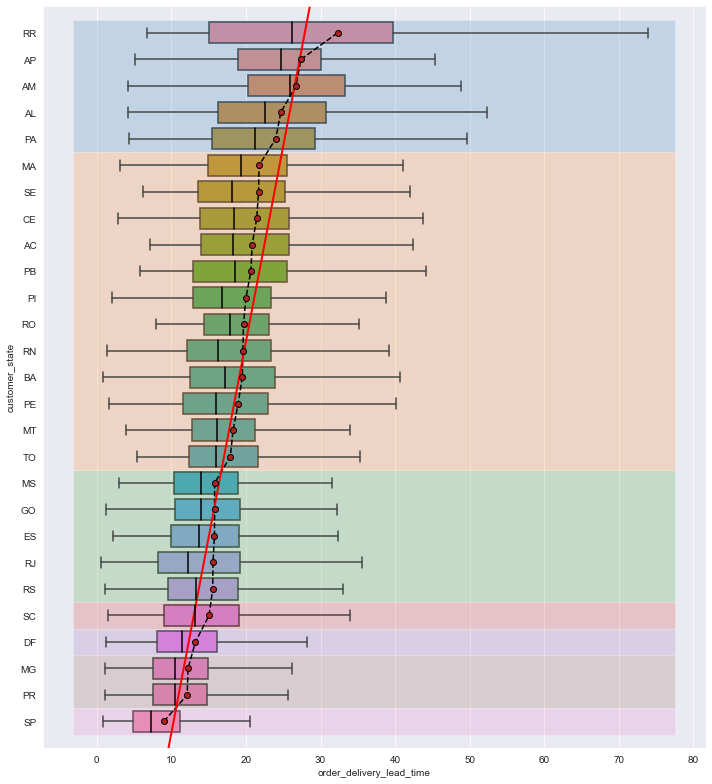

► ANOVA pour la paire :  ['customer_state', 'freight_value']
  → Rapport de corrélation pour les k= 27 catégories du graphique et n= 93396 données : η²=0.13
  → Test de normalité de Shapiro positif pour toutes les catégories
  → Test d'homoscédasticité de Bartlett négatif : p-value=0.00e+00
  → Test de Welch négatif entre les catégories de même groupe sur le graphique
  → Résultat positif du test de Fisher : F=809.76 > 1.50  , et p-value=9.79e-178 < 0.05
 Rappel des hypothèses relatives au test :
  - H0 : les moyennes par catégories sont égales entre elles (les variables sont indépendantes)
  - H1 : la moyenne d'au moins une catégorie diffère des autres (les variables sont corrélées)

  → Moyenne catégorielle : 'freight_value' = 16.75  + 1.08 * 'customer_state', avec : 'SP'= 0 , …, 'RO'= 26
  → Coefficient de corrélation r² =0.96


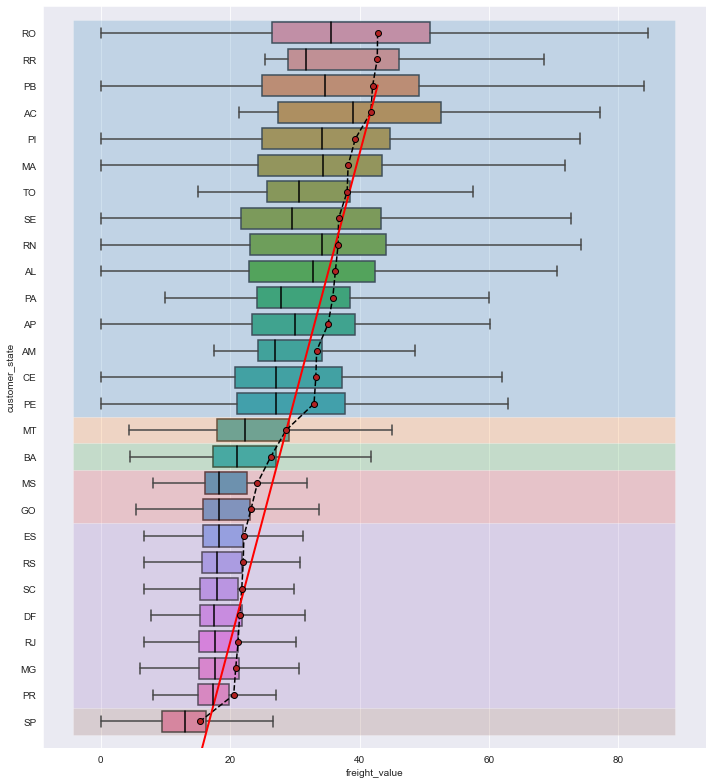

► ANOVA pour la paire :  ['payment_sequential', 'product_mean_count']
  → Rapport de corrélation pour les k= 2 catégories du graphique et n= 93396 données : η²=0.15
  → Test de normalité de Shapiro positif pour toutes les catégories
  → Test d'homoscédasticité de Bartlett négatif : p-value=0.00e+00
  → Test de Welch (non égalité des moyennes) positif pour toutes les catégories
  → Résultat positif du test de Fisher : F=234925.47 > 3.84  , et p-value=0.00e+00 < 0.05
 Rappel des hypothèses relatives au test :
  - H0 : les moyennes par catégories sont égales entre elles (les variables sont indépendantes)
  - H1 : la moyenne d'au moins une catégorie diffère des autres (les variables sont corrélées)

  → Moyenne catégorielle : 'product_mean_count' = 1.14  + 1.58 * 'payment_sequential', avec : '0'= 0 , …, '1'= 1
  → Coefficient de corrélation r² =1.00


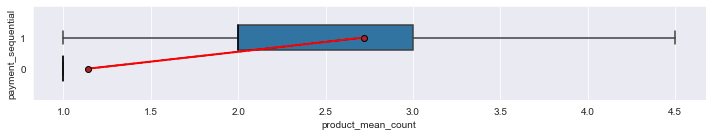

In [20]:
# Rapports de corrélations
fct.threshold = 0.35
cat_var = ['customer_state', 'payment_sequential', 'payment_installments', 'product_category']
num_var = ['recency', 'frequency',  'order_count', 'monetary', 'review_score', 'order_delivery_lead_time',
           'order_delivery_accuracy', 'freight_value', 'product_mean_count', 'product_mean_value']
fct.eta_table(data_customers, cat_var, num_var)

# Anova
fct.anova(data_customers, ['customer_state', 'order_delivery_lead_time'], nb_cat=27, verbose=1)
fct.anova(data_customers, ['customer_state', 'freight_value'], nb_cat=27, verbose=1)
fct.anova(data_customers, ['payment_sequential', 'product_mean_count'], nb_cat=2, verbose=1)

<a id="var_selection"></a>
### 5.3 - Modification du jeu de données en conséquence de l'analyse
En conséquence de l'analyse multivariée et du fait que nous ne conservons que les variables caractérisant les clients, les variables suivantes sont retirées du jeu de données clients :
- 'order_delivery_accuracy' : cette variable a finalement moins d'intérêt que la variable de délai de livraison ;
- 'order_delivery_lead_time' : cette variable ne caractérise pas les clients, mais la prestation des fournisseurs, et elle est par ailleurs corrélée avec le 'review_score' s'agissant de la satisfaction des clients ;
- 'product_mean_count' : apporte peu d'information compte tenu que les commandes sont essentiellement constituées d'un seul article ;
- 'product_mean_value' : proche de la variable 'monetary' compte tenu que 97% des clients n'ont passé qu'une seule commande ;
- 'freight_value' : n'apporte pas d'information supplémentaire par rapport à 'order_delivery_lead_time' ;
- 'order_count' : redondante avec la variable 'frequency' ;
- 'product_category' : constituée de nombreuses catégories sans catégories modales et décorrélées des autres variables, elle n'apporte pas d'explication sur le comportement d'achat des clients.

Par ailleurs, la variable 'customer_state' est réduite aux pays les plus représentatifs du jeu de données et donc modifiée en 3 catégories représentants 2/3 des clients, plus une catégorie 'OS' pour Other States.

In [21]:
# Suppression des variables du jeu de données
rm_list = ['order_delivery_accuracy', 'order_delivery_lead_time', 'product_mean_count',
           'product_mean_value', 'freight_value', 'order_count', 'product_category']
num_var = list(set(num_var) - set(rm_list))
data_customers.drop(labels=rm_list, axis=1, inplace=True)

In [22]:
# Réduction des catégories de la variable 'customer_state'
state_cat = ['SP', 'MG', 'RJ', 'OS']
state_dict = {'SP': 'SP', 'MG': 'MG', 'RJ': 'RJ',
              'SC': 'OS', 'PA': 'OS', 'PR': 'OS', 'MA': 'OS', 'ES': 'OS', 'RS': 'OS', 'GO': 'OS',
              'DF': 'OS', 'BA': 'OS', 'MT': 'OS', 'SE': 'OS', 'TO': 'OS', 'PE': 'OS', 'CE': 'OS',
              'AL': 'OS', 'AC': 'OS', 'PI': 'OS', 'PB': 'OS', 'RN': 'OS', 'AM': 'OS', 'MS': 'OS',
              'RR': 'OS', 'AP': 'OS', 'RO': 'OS'}
data_customers['customer_state'].replace(state_dict, inplace=True)
data_customers['customer_state'] = pd.Categorical(data_customers['customer_state'], categories=state_cat, ordered=True)
print(data_customers['customer_state'].unique())

['SP', 'OS', 'RJ', 'MG']
Categories (4, object): ['SP' < 'MG' < 'RJ' < 'OS']


[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="conclusion"></a>
## 6 - Conclusion
A l'issue de ce premier notebook, nous disposons d'un jeu de données de 93396 clients pour la recherche de clustering, avec 7 variables potentiellement utilisables :
- les 3 variables RFM,
- selon le besoin, avec 4 variables complémentaires permettant de prendre en considération la localisation des clients, leur niveau de satisfaction et les caractéristiques de paiement.

In [23]:
# Jeu de donnée résultant
display(data_customers.info())

# Enregistrement du jeu de données clients au format csv
data_customers.to_csv(data_dir + "\\" + "data_customers.csv", encoding='utf-8-sig', index=True, sep=';')

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 93396 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   customer_state        93396 non-null  category
 1   recency               93396 non-null  float64 
 2   frequency             93396 non-null  float64 
 3   monetary              93396 non-null  float64 
 4   review_score          93396 non-null  float64 
 5   payment_sequential    93396 non-null  category
 6   payment_installments  93396 non-null  category
dtypes: category(3), float64(4)
memory usage: 7.7 MB


None

[<font color='red'><em>retour sommaire</em></font>](#sommaire)